# EDA solo project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### **Glosario de Columnas - CustomerChurn.csv**

| Columna               | Descripción                                                                 | Valores posibles                                                                 |
|-----------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| **customerID**        | Identificador único del cliente.                                            | Códigos alfanuméricos (ej: `7590-VHVEG`).                                        |
| **gender**            | Género del cliente.                                                         | `Female`, `Male`.                                                                |
| **SeniorCitizen**     | Indica si el cliente es adulto mayor (ej: >65 años).                        | `0` (No), `1` (Sí).                                                             |
| **Partner**           | Si el cliente tiene pareja (conyugue o compañero/a).                        | `Yes`, `No`.                                                                     |
| **Dependents**        | Si el cliente tiene dependientes (hijos o personas a cargo).                | `Yes`, `No`.                                                                     |
| **tenure**            | Meses de permanencia del cliente en la compañía.                            | Enteros (ej: `1`, `34`).                                                         |
| **PhoneService**      | Si el cliente tiene servicio telefónico contratado.                         | `Yes`, `No`.                                                                     |
| **MultipleLines**     | Si el cliente tiene múltiples líneas telefónicas.                          | `Yes`, `No`, `No phone service` (si no tiene servicio).                          |
| **InternetService**   | Tipo de servicio de internet contratado.                                    | `DSL`, `Fiber optic`, `No`.                                                      |
| **OnlineSecurity**    | Si tiene seguridad en línea (ej: antivirus).                                | `Yes`, `No`, `No internet service` (si no tiene internet).                       |
| **OnlineBackup**      | Si tiene backup en la nube.                                                 | `Yes`, `No`, `No internet service`.                                              |
| **DeviceProtection**  | Si tiene protección para dispositivos.                                      | `Yes`, `No`, `No internet service`.                                              |
| **TechSupport**       | Si tiene soporte técnico incluido.                                          | `Yes`, `No`, `No internet service`.                                              |
| **StreamingTV**       | Si tiene servicio de streaming de TV (ej: Netflix).                         | `Yes`, `No`, `No internet service`.                                              |
| **StreamingMovies**   | Si tiene servicio de streaming de películas.                                | `Yes`, `No`, `No internet service`.                                              |
| **Contract**          | Tipo de contrato del cliente.                                               | `Month-to-month`, `One year`, `Two year`.                                        |
| **PaperlessBilling**  | Si recibe factura electrónica (sin papel).                                  | `Yes`, `No`.                                                                     |
| **PaymentMethod**     | Método de pago del cliente.                                                 | `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)`. |
| **MonthlyCharges**    | Monto mensual facturado al cliente.                                         | Decimales (ej: `29.85`).                                                         |
| **TotalCharges**      | Monto total facturado al cliente durante su relación.                       | Decimales (ej: `1889.5`). Puede estar vacío para clientes nuevos.                |
| **Churn**             | Si el cliente abandonó el servicio ("baja").                                | `Yes` (sí abandonó), `No` (sigue activo).                                        |

In [5]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

# DATA CLEANING

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Vemos que no hay valores nulos en ninguna columna
* Notamos que la columna TotalCharges debería ser float, pero es object, hay que revisarla

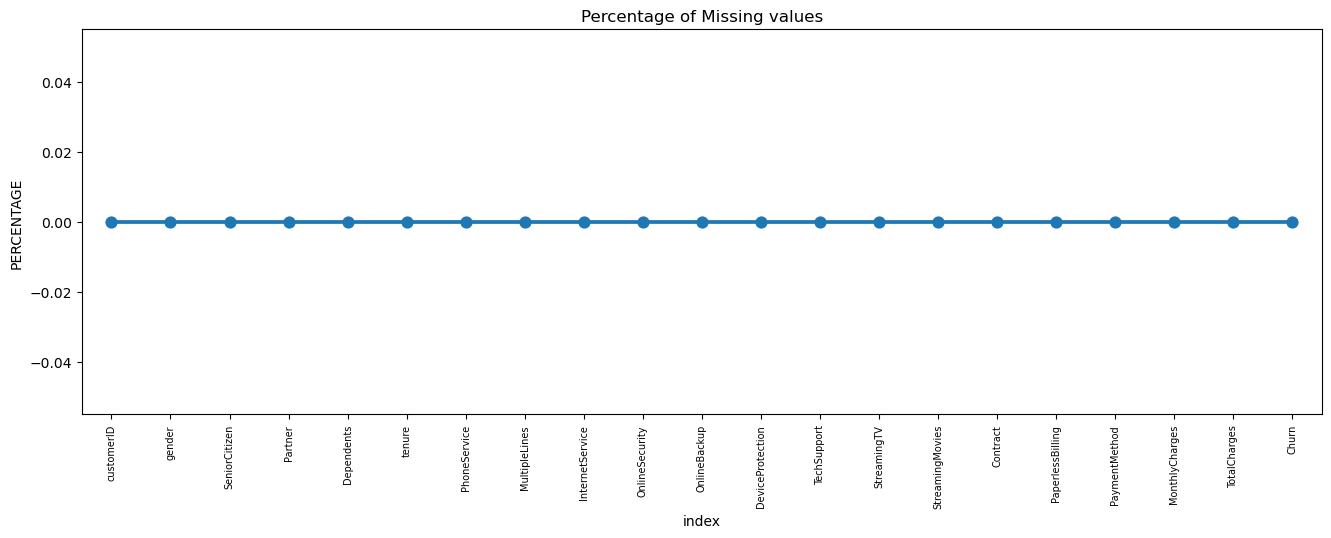

In [7]:
# Verify null values (from yt)
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)  # Nombres de columnas como strings
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [8]:
# ordering the values
df['TotalCharges'].value_counts().sort_index()

TotalCharges
          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: count, Length: 6531, dtype: int64

In [9]:
# Finding na observations
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# Confirm if the cause is that Tenure is equal to 0 (should list 11 rows)
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# fill values with 0
df.loc[(df['tenure'] == 0), 'TotalCharges'] = 0

In [12]:
# Check if it worked
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [17]:
# those rows aren't relevant, so let's drop them
df = df[df['tenure'] != 0]

In [77]:
# parse column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [78]:
# statistic metrics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


* SeniorCitizen parece ser categórica (0, 1) por sus cuartiles mostrados
* Tenure (meses) indica que menos del 75% tiene 55 meses
* MonthlyCharges nos indica que el promedio de pago mensual es 64.76

## Check churn distribution

[]

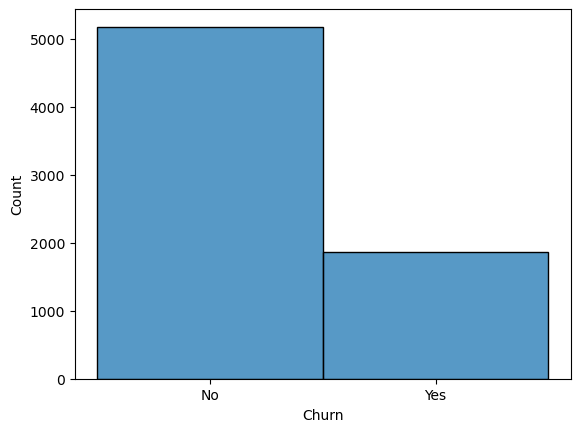

In [15]:
# Realize what's the distribution on churned/not churned
sns.histplot(data=df, x='Churn')
plt.plot()

In [16]:
# Get churned count and yes churned
churn_distribution = df['Churn'].value_counts()
churn_yes = churn_distribution.iat[1]
churn_yes

np.int64(1869)

In [17]:
# Get yes churned %
round(churn_yes / churn_distribution.sum() * 100, 2)

np.float64(26.54)

* Podemos ver que el 26.54% del total de clientes tienen estado churn 'Yes'. Es decir, son los que han sido dados de baja del servicio

### Identify irrelevant columns

In [18]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [19]:
# lets drop columns we won't use
df = df.drop(['customerID'], axis=1)

### Add a bin column for tenure

In [63]:
df['tenure'].max()

np.int64(72)

In [33]:
# get bins (+13 to claim the max tenure (72) is considered)
bins = list(range(1, df['tenure'].max() + 13, 12))
bins

[1, 13, 25, 37, 49, 61, 73]

In [35]:
# get labels based on bins, using zip to combine the same array but at different indexes
bin_labels = [f'{i} - {j-1}' for i, j in zip(bins, bins[1:])]
bin_labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [ ]:
# assign the categorical ranges to the new column
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins , labels=bin_labels, include_lowest=True, ordered=True)

In [48]:
# validate new column ranges
df['tenure_bin'].value_counts()

tenure_bin
1 - 12     2284
61 - 72    1331
13 - 24     994
49 - 60     842
25 - 36     818
37 - 48     763
Name: count, dtype: int64

In [ ]:
# drop original tenure
df = df.drop(columns=['tenure'])

## Check if there are outliers

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 non-nu

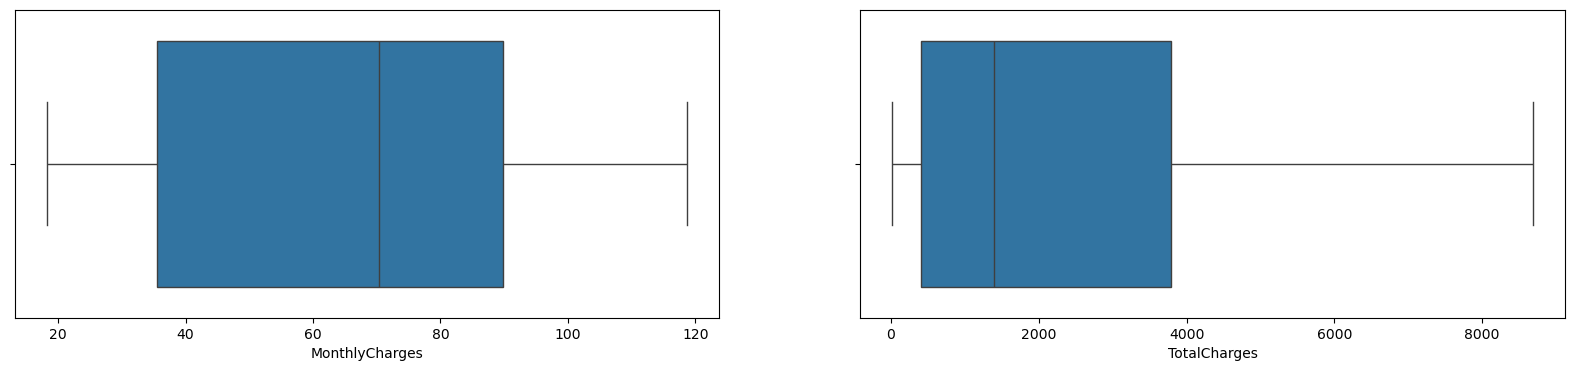

In [84]:
#get numeric values
numeric_cols = ['MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1,2, figsize=(20, 4))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])

plt.show()

# Univariate Analysis

In [61]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'binned_tenure'],
      dtype='object')

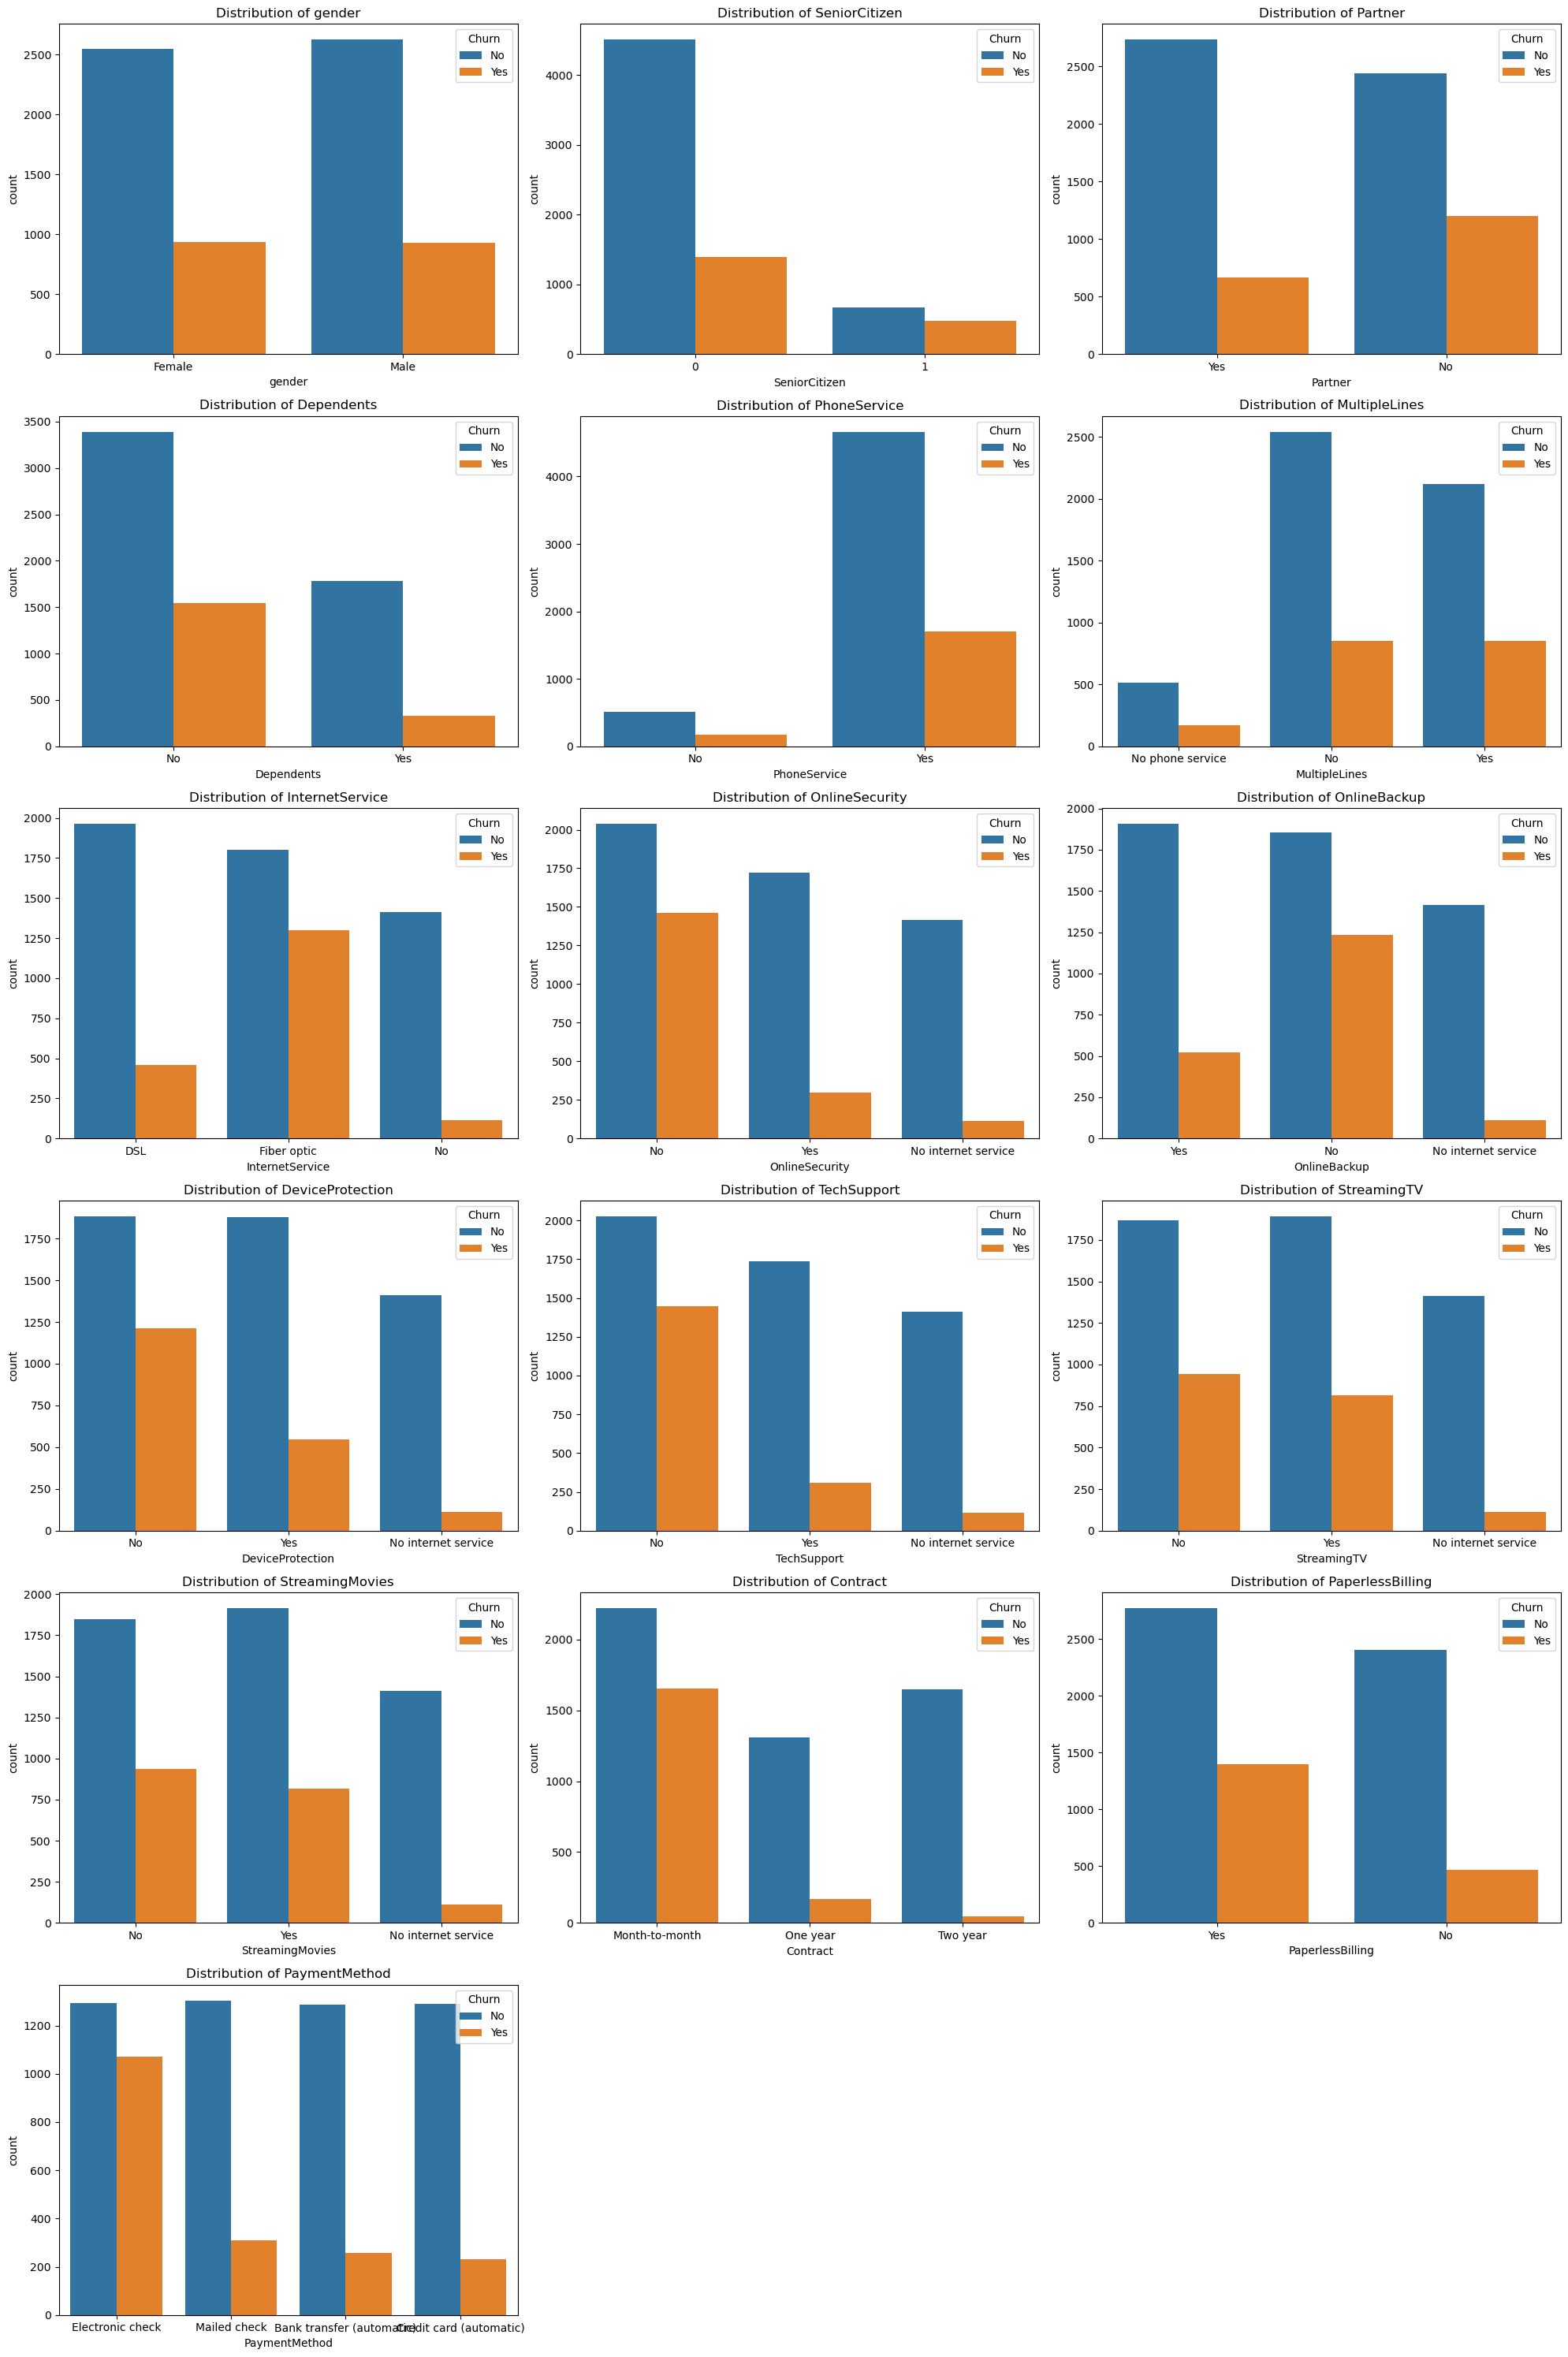

In [ ]:
def plot_univariate_relation(df):
    # get rid irrelevant columns (numeric and target cols)
    # current_df = df.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'])
    plot_columns = [ col for col in df.columns if col not in ['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure']]
    # plot_columns = [col for col in df.columns 
    #             if col not in ['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'] 
    #             and df[col].nunique() < 10]
    
    # get the cols and rows variables for subplots
    n_cols = 3
    n_rows = (len(plot_columns) // n_cols) + 1
    
    # fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten()
    
    # iterate over the columns to plot each one in the suitable ax[i]
    for i, column in enumerate(plot_columns):
        sns.countplot(data=df, x=column, hue='Churn', ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    # clean/delete blank plots
    for j in range(len(plot_columns), len(axes)):
        axes[j].set_visible(False)
    
    # plot all the graphs
    plt.tight_layout()
    plt.show()

plot_univariate_relation(df)

Observamos la distribución de cada variable respecto a si fueron dados de baja o no (churn) haciendo el análisis univariado
* La distribución es correcta, no hay problemas de escritura que corregir en valores
* Respecto al género no hay diferencia
* En los seniority (tercera edad e.g +65), hay mayor porcentaje de dados de baja si lo son
* En partner(pareja), los que no tienen suelen darse de baja más

### Relation numeric variables vs target

In [90]:
numeric_cols

['MonthlyCharges', 'TotalCharges']

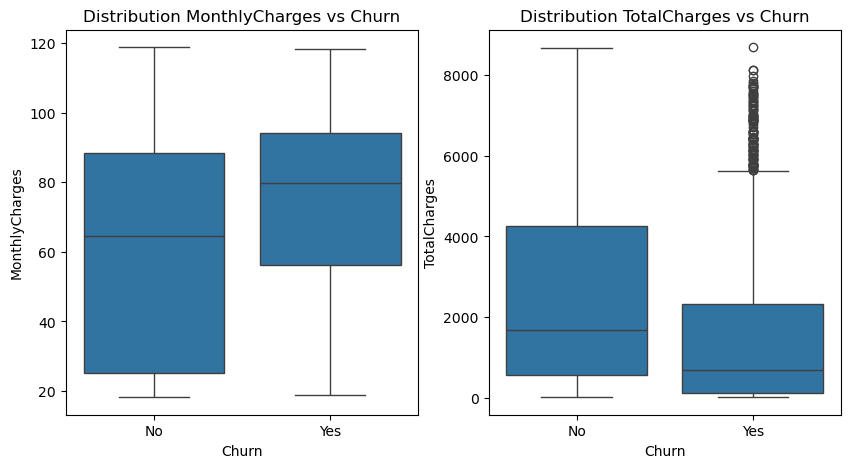

In [97]:
# using numeric cols variable

fig, axes = plt.subplots(1, 2, figsize=(10,5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'Distribution {col} vs Churn')

plt.show()
    

* Vemos que mayormente los que tengan un cargo mensual aproximado de entre 60 y 90 son más propensos a ser dados de baja (churned)
* Vemos que los que tienen un cargo total aproximadamente menor a 2000, fueron dados de baja
* Estas inferencias no son tan claras ni concluyentes, se pueden hacer análisis con más variables para que nos den información más precisa quizás

### Análisis por tasas de conversión

In [119]:
df.groupby('tenure_bin', observed=False)['Churn'].mean()

tenure_bin
1 - 12     0.470665
13 - 24    0.280684
25 - 36    0.210269
37 - 48    0.190039
49 - 60    0.134204
61 - 72    0.063862
Name: Churn, dtype: float64

In [112]:
# util function provided by yt
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = df.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

In [104]:
# convert target values yes/no to 1/0
churn_convert = {
    'Yes': 1,
    'No': 0
}

df['Churn'] = df['Churn'].map(churn_convert)

C:\Users\RAFAEL-PC\AppData\Local\Temp\ipykernel_16856\333214013.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()


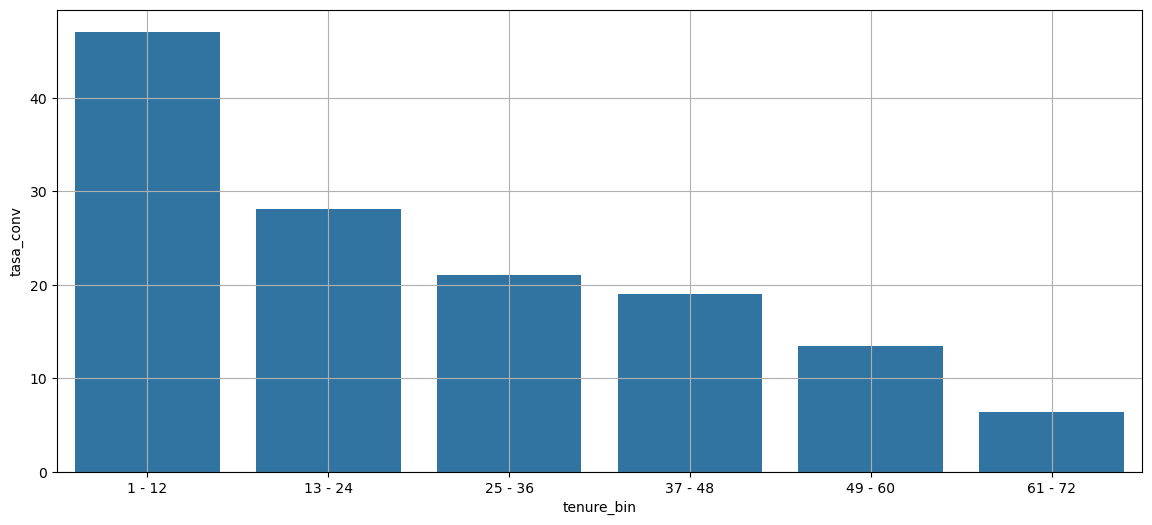

In [113]:
graficar_tasas_conversion('tenure_bin', 'Churn', type='bar')

* Vemos que los relativamente nuevos o que tienen tenure de 1 a 12 meses suelen ser más propensos a ser dados de baja
* Se puede hacer esta comparación con cada variable para obtener el mismo análisis

# Numeric Analysis

## Using one-hot encoding with dummy variables

In [ ]:
# get dummy df
df_dummy = pd.get_dummies(data=df, dtype='int64')

### Correlation independent variables vs Target

<Axes: >

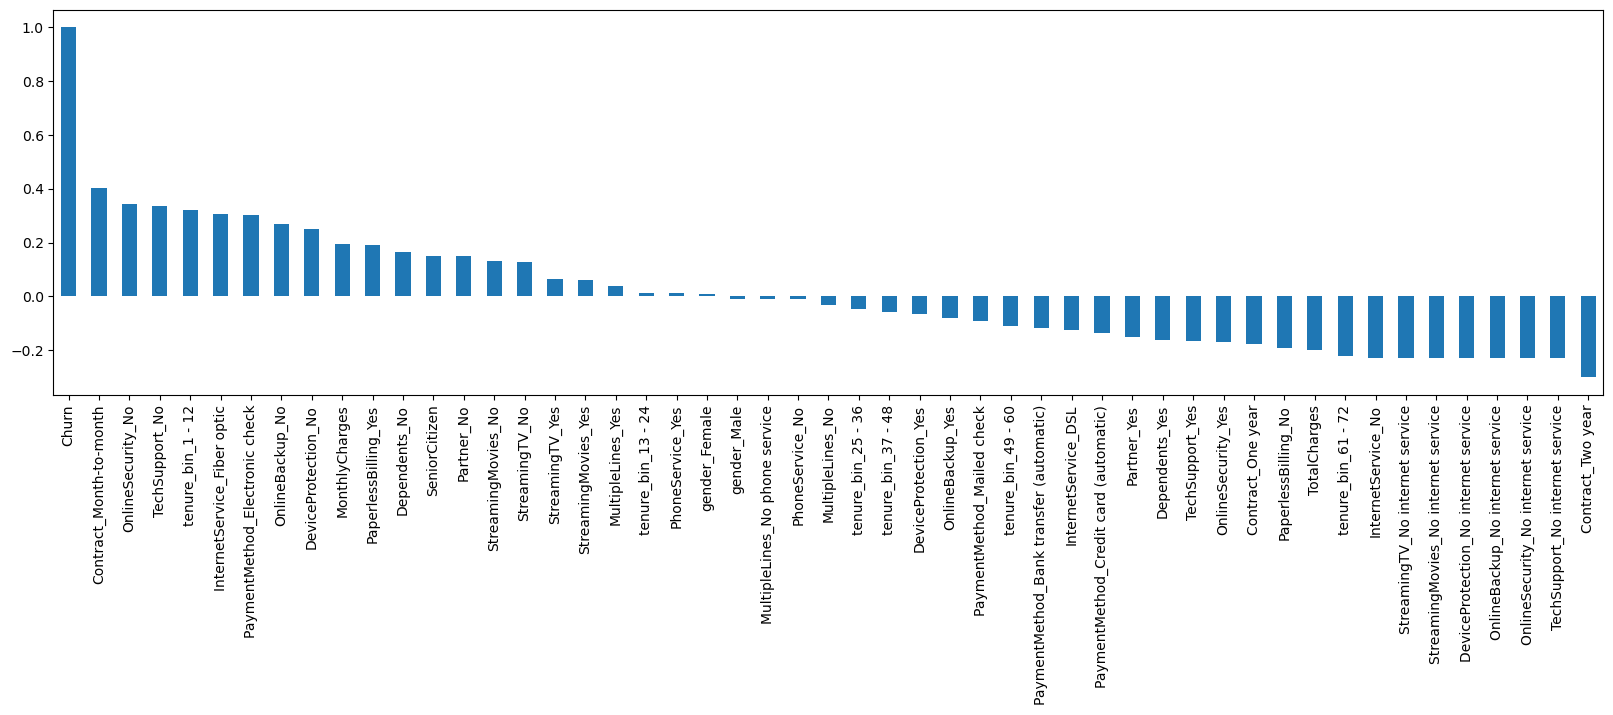

In [ ]:
df_dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

* Vemos que las variables con más correlación positiva son "Contract_Month-to-month", "OnlineSecurity_No", "TechSupport_No"
* Con mayor correlación negativa son "Contract_Two year", "TechSuport_No internet service", "OnlineSecurity_No internet service"
* Hay que considerar que la correlación no es tan fuerte
* Y las demás variables no tienen un impacto relevante en la variable objetivo (Churn)

### Correlation between all the variables

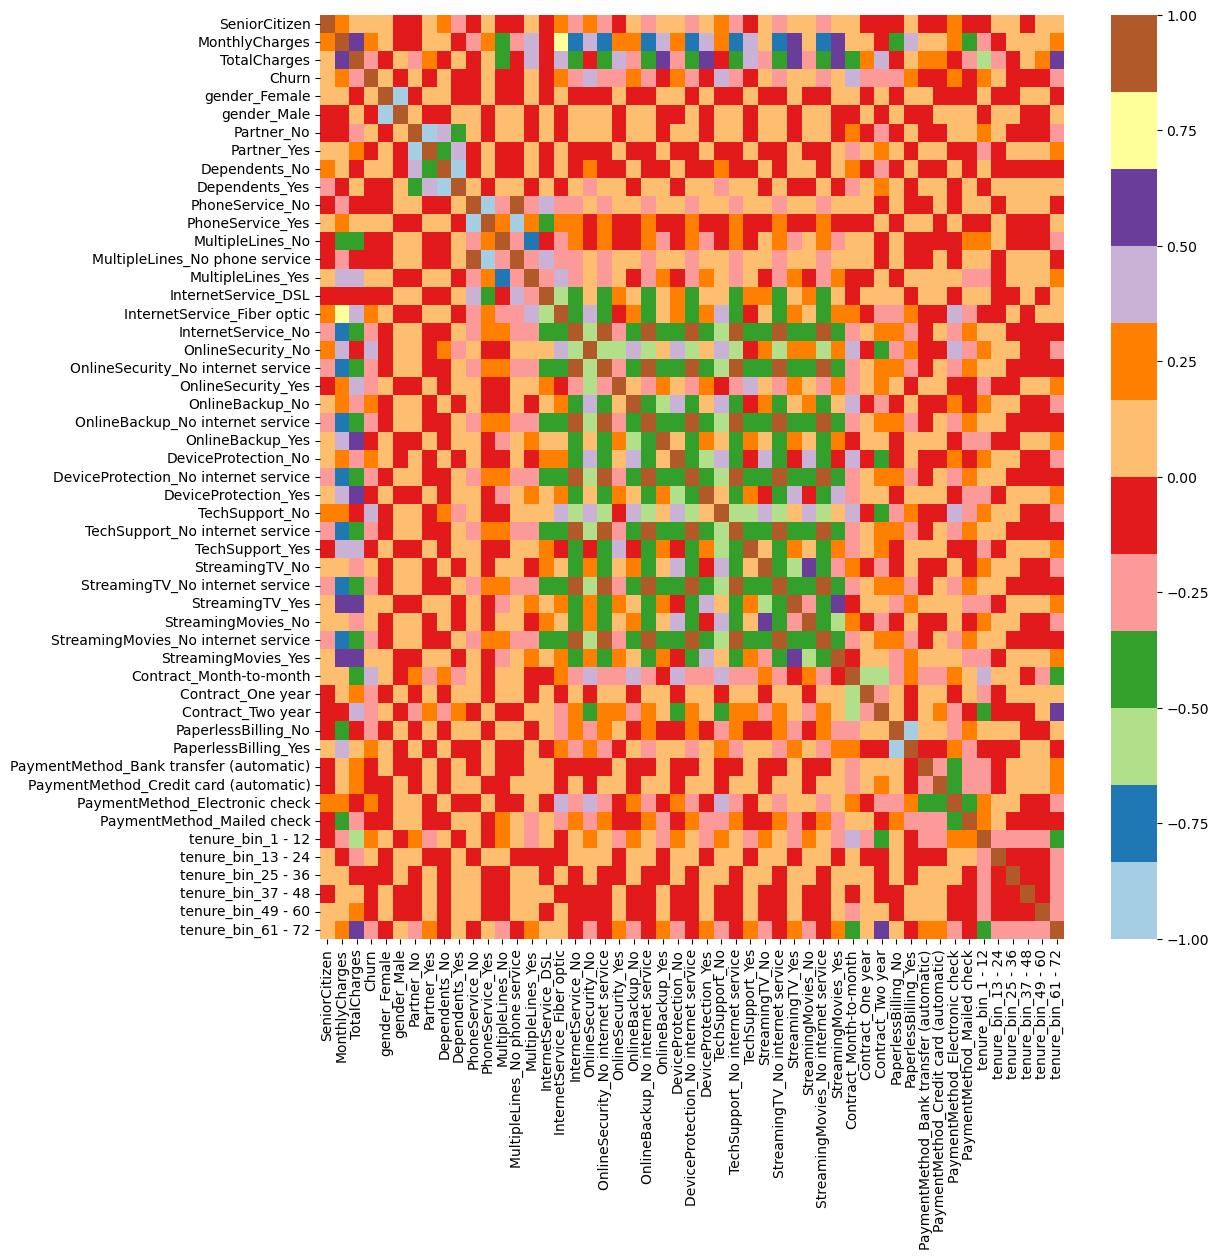

In [ ]:
# get heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=df_dummy.corr(), cmap='Paired')
plt.show()

* Con el heatmap también podemos validar las correlaciones que vimos antes, guiándonos por la intensidad del color

## Bivariate Analysis

Realizamos análisis comparando 2 variables, respecto a la variable dependiente

In [23]:
# numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


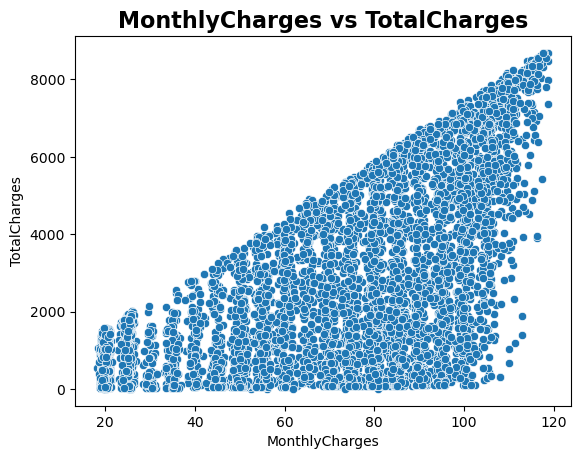

In [27]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges')
plt.title('MonthlyCharges vs TotalCharges', fontsize='16', fontweight='bold')
plt.show()

### Conversion rate

In [120]:
# Tasa de conversión para dos columnas
def graficar_tc_bivariada(col_list, orden=None):
  tc = df.groupby(col_list, observed=False)['Churn'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['Churn'], y=tc[col_list[0]], hue=tc[col_list[1]], linestyle='none', order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Conversion rate for {col_list[0]} and {col_list[1]}')
  plt.xlabel('% Conversion')
  plt.xlim((0,1));

In [115]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_bin'],
      dtype='object')

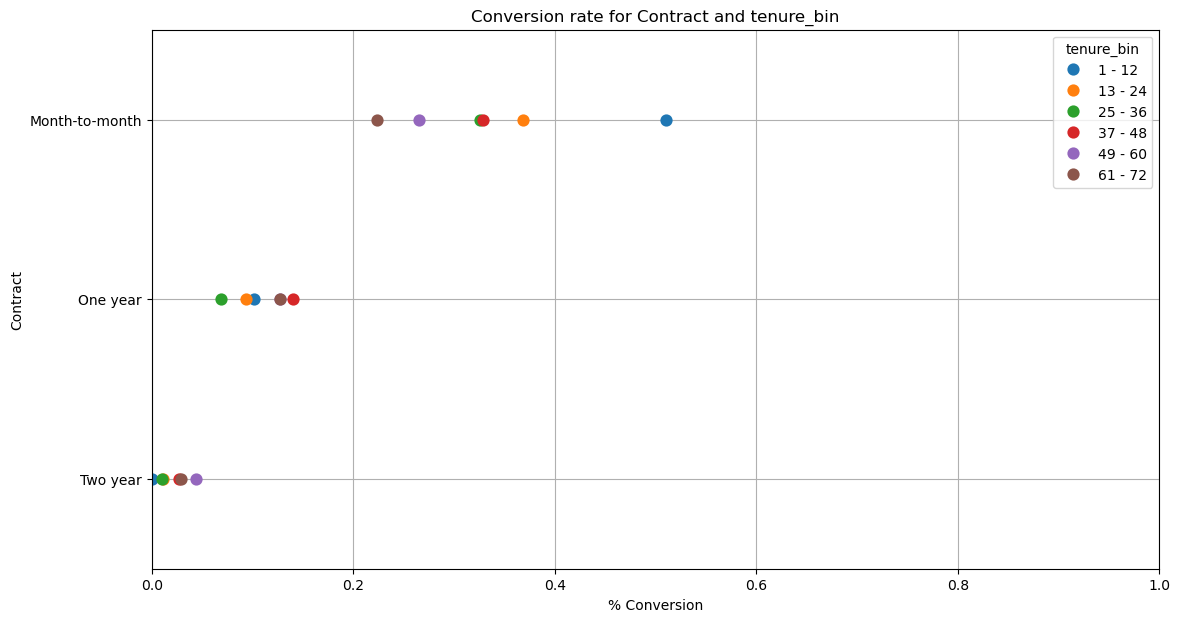

In [121]:
graficar_tc_bivariada(['Contract', 'tenure_bin'])

* En el análisis univariado vimos que el tipo de contrato month-to-month era relevante para el estado Churn, y ahora estamos confirmando que también está ligado a los meses (tenure) del cliente, ya que si el contrato es month-to-month y el tenure_bin es de 1-12 la tasa de conversión es alta (un poco más del 50%) y básicamente el cambio es constante.
* También vemos que conforme aumentan los meses, la tasa de conversión disminuye

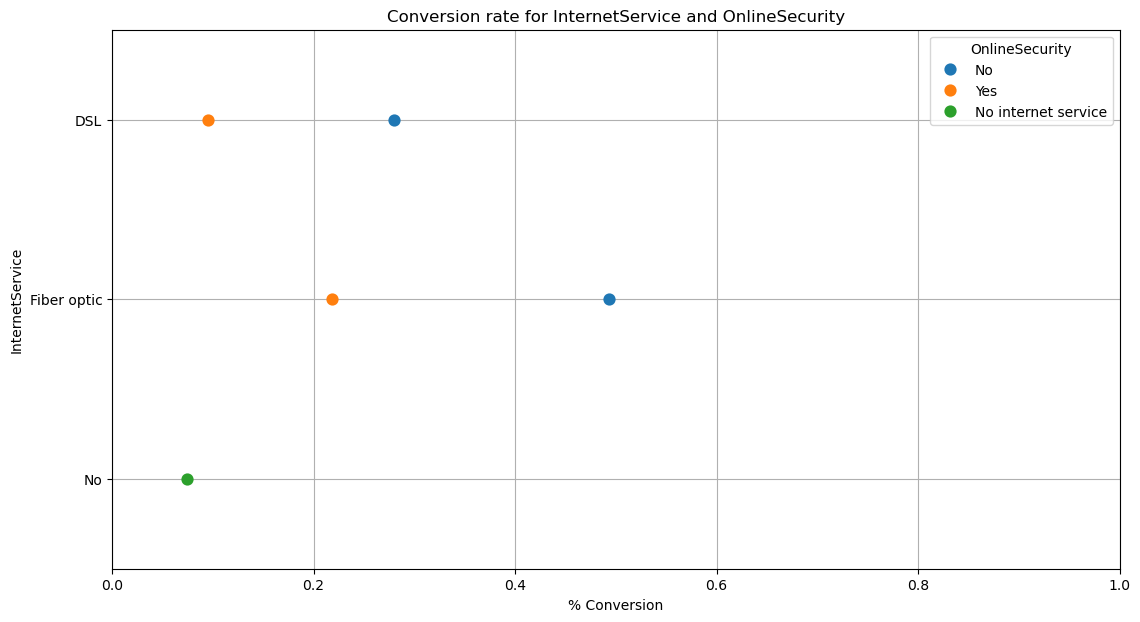

In [123]:
graficar_tc_bivariada(['InternetService', 'OnlineSecurity'])

* En esta relación podemos ver que los más propensos a ser dados de baja son los que cuentan con el servicio de Fiber optic
* Vemos que el hecho de que cuenten con OnlineSecurity influye en el estado Churn, ya que los que no cuentan con este son más propensos a esto
* En resumen vemos que la tasa de conversión es mayor si el cliente cuenta con Fiber pptic pero no cuenta con Online Security

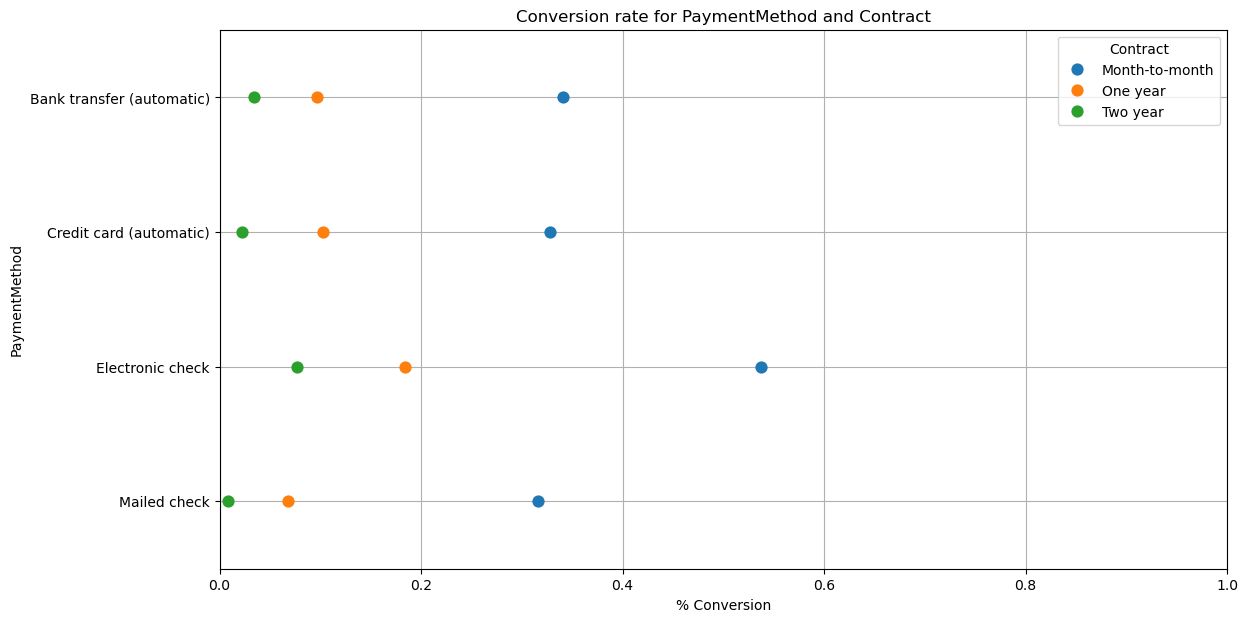

In [124]:
graficar_tc_bivariada(['PaymentMethod', 'Contract'])

* Ya sabemos que el Contract es clave en el análisis y sobre todo el month-to-month presentaba más tasa de conversión. Acá estamos viendo que el hecho de que el PaymentMethod sea por Electronic check es la razón princiál de que la tasa de conversión sea alta

In [125]:
# basic correlation (near 1 is positive correlated)
df['MonthlyCharges'].corr(df['TotalCharges'])

np.float64(0.6510648032262024)

### Util function for bivariate analysis (from yt)

In [168]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    # plt.yscale('log') # seems to be not recommended in new versions because the plot displays badly
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [156]:
# gemini uniplot optimization
def plot_categorical_counts(df, col, hue=None, title=None,
                            order_by_freq=True, rotate_xticks=True,
                            log_scale=False, figsize=(12, 6), palette='bright',
                            xlabel=None, ylabel='Count', **kwargs):
    """
    Genera un countplot para una variable categórica, opcionalmente agrupado por otra.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        col (str): Nombre de la columna principal (eje x).
        hue (str, optional): Nombre de la columna para agrupar (color). Defaults to None.
        title (str, optional): Título del gráfico. Si es None, se genera uno básico. Defaults to None.
        order_by_freq (bool, optional): Si es True, ordena las barras por frecuencia descendente. Defaults to True.
        rotate_xticks (bool, optional): Si es True, rota las etiquetas del eje x 45 grados. Defaults to True.
        log_scale (bool, optional): Si es True, usa escala logarítmica en el eje y. Defaults to False.
        figsize (tuple, optional): Tamaño de la figura. Defaults to (12, 6).
        palette (str, optional): Paleta de colores de Seaborn. Defaults to 'bright'.
        xlabel (str, optional): Etiqueta del eje x. Si es None, usa el nombre de 'col'. Defaults to None.
        ylabel (str, optional): Etiqueta del eje y. Defaults to 'Count'.
        **kwargs: Argumentos adicionales pasados a sns.countplot.
    """
    plt.figure(figsize=figsize)

    # Determinar el orden si se solicita
    plot_order = None
    if order_by_freq:
        plot_order = df[col].value_counts().index

    # Generar el gráfico
    ax = sns.countplot(data=df, x=col, hue=hue, order=plot_order, palette=palette, **kwargs)

    # Configurar título
    if title is None:
        if hue:
            plot_title = f'Count of {col} grouped by {hue}'
        else:
            plot_title = f'Count of {col}'
    else:
        plot_title = title
    plt.title(plot_title)

    # Configurar etiquetas de ejes
    ax.set_xlabel(xlabel if xlabel else col)
    ax.set_ylabel(ylabel)

    # Escala logarítmica si se solicita
    if log_scale:
        plt.yscale('log')
        # Podrías añadir lógica para mostrar etiquetas en escala log si es necesario
        # ax.yaxis.set_major_formatter(ticker.ScalarFormatter()) # Por ejemplo

    # Rotar etiquetas si se solicita y hay suficientes categorías
    if rotate_xticks and len(df[col].unique()) > 5: # Rotar solo si hay varias categorías
         plt.xticks(rotation=45, ha='right') # ha='right' mejora alineación

    plt.tight_layout() # Ajusta el layout para evitar solapamientos
    plt.show()

In [148]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_bin'],
      dtype='object')

In [151]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


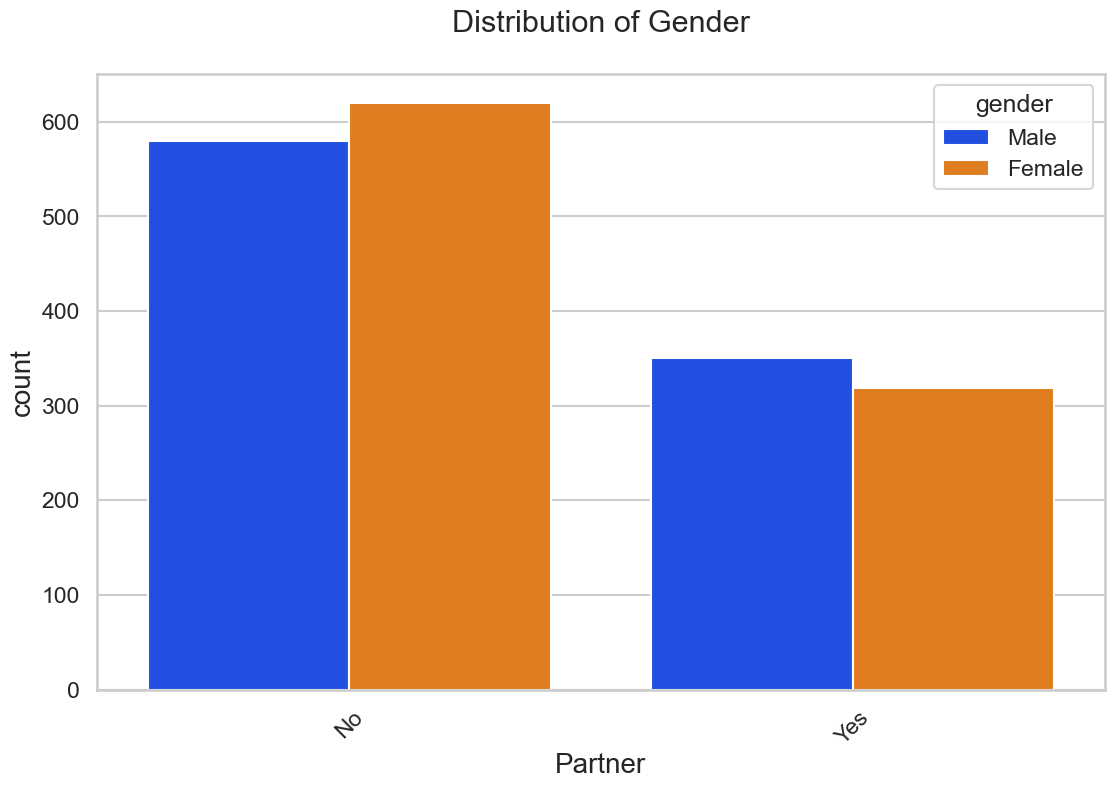

In [ ]:
# uniplot(df[df['Churn']==0], col='Partner', title='Distribution of Gender', hue='gender')

new_df1_target0=df.loc[df["Churn"]==0]
new_df1_target1=df.loc[df["Churn"]==1]

uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')
# plot_categorical_counts(new_df1_target1, col='Partner', title='Distribution of Gender', hue='gender')

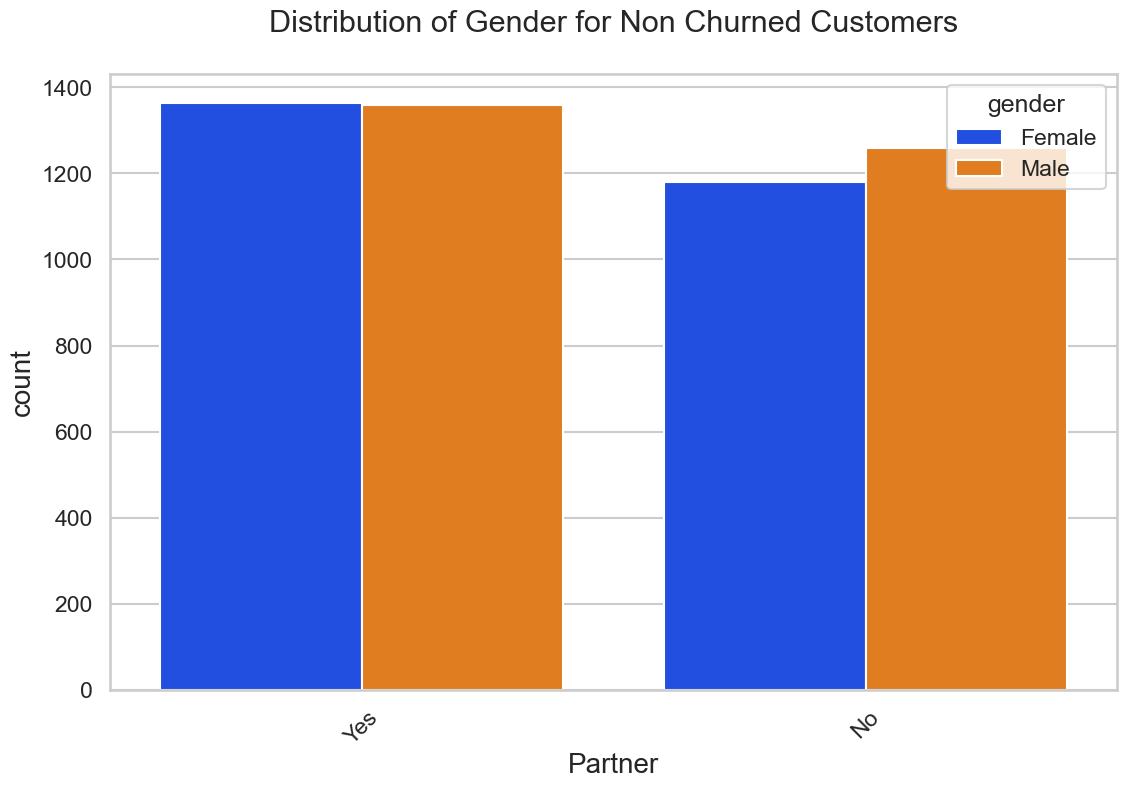

In [172]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

* Vemos que no hay mucha diferencia entre la distribución de Partner(tiene pareja) con el género para los casos churned y no churned

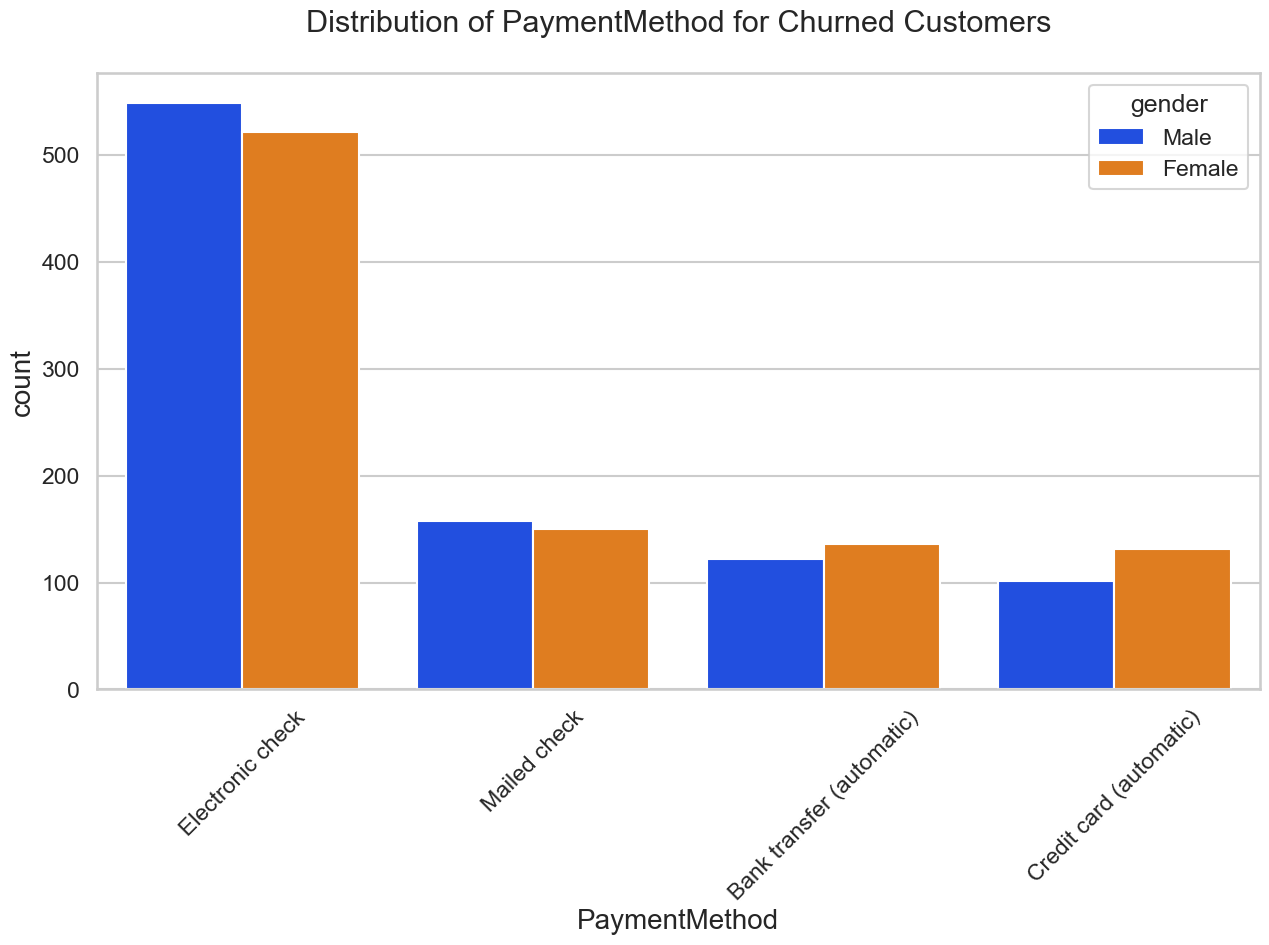

In [173]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

* Vemos que para los de estado churned, los que predominan son los del pago de tipo "Electronic check", y particularmente las mujeres

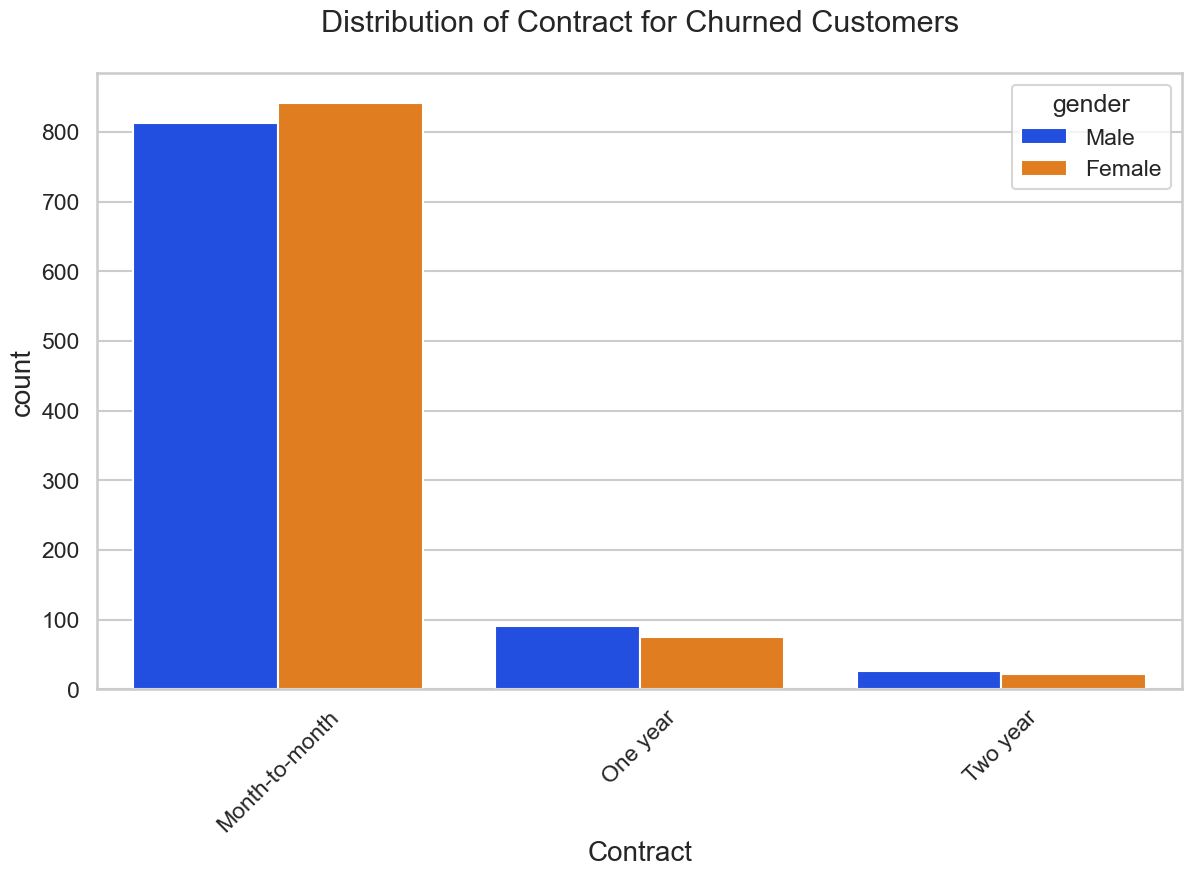

In [178]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

* Los clientes de contrato "Month to month" son los más propensos a darse de baja

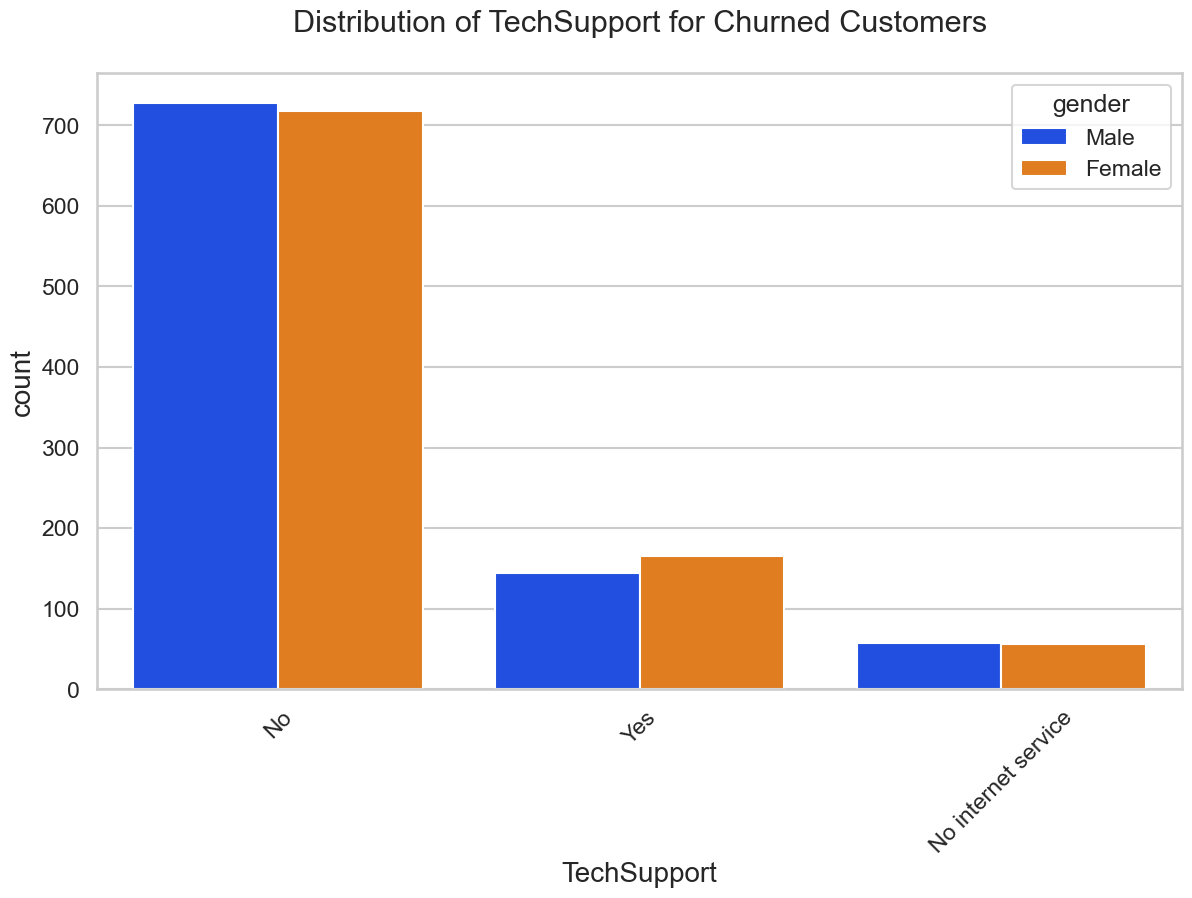

In [179]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

* Los que no tienen TechSupport son más propensos a darse de bajo, lo mismo para onlineSecurity

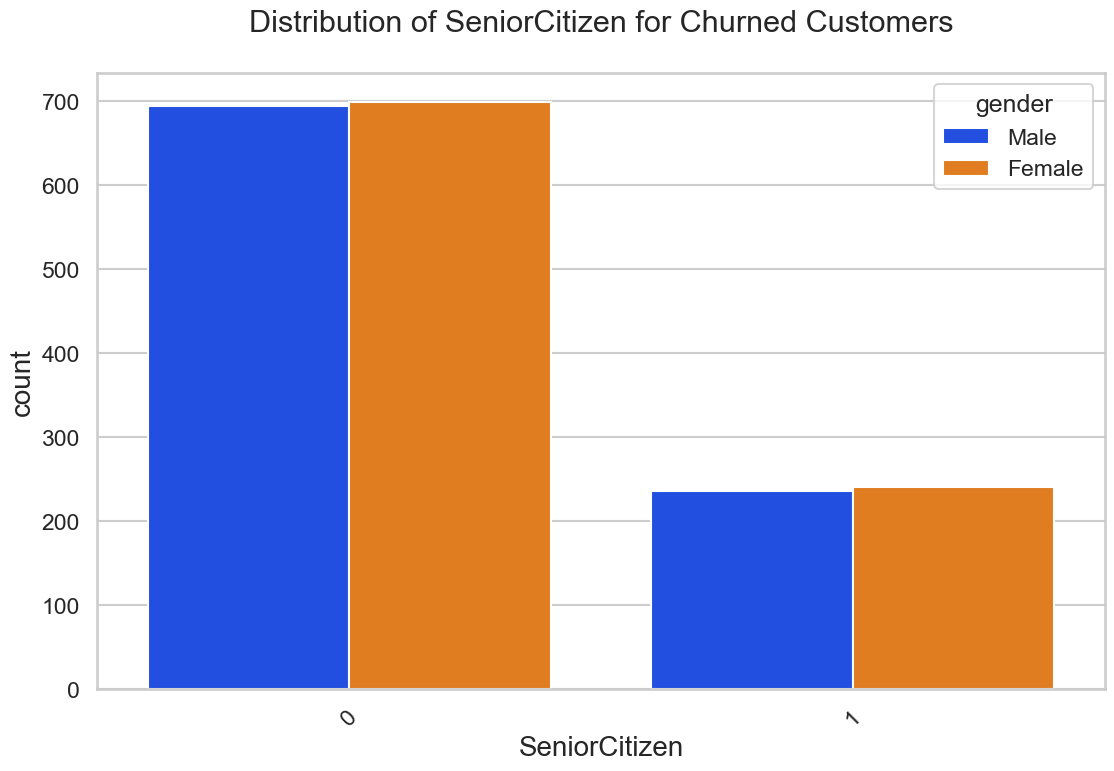

In [180]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

* Los que no son seniorCitizen (adulto mayor), son mayores churners